In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#players_df = pd.read_csv('../Fantasy research/data/player.2018.csv')

#Load csv containing draft information
adp = pd.read_csv('../Fantasy research/data/ADP.2018.csv')

#Load csv containing statistics from 2018 season
season_stats = pd.read_csv('../Fantasy research/data/PlayerSeason.2018.csv')
season_stats = season_stats[season_stats.SeasonType == 1]
season_stats_def = pd.read_csv('../Fantasy research/data/FantasyDefenseSeason.2018.csv')
season_stats_def = season_stats_def[season_stats_def.SeasonType == 1]

#Rename fantasy points column in adp dataframe to reflect that it contains a projection
adp = adp.rename(columns = {'FantasyPoints':'ProjectedFantasyPoints'})

#Restrict analysis to players with an ADP of less than 200
adp = adp[adp['AverageDraftPosition']<200]

#Rename adp column in stats dataframes to reflect that it contains adp for the 2019 season (irrelevant for us)
season_stats = season_stats.rename(columns = {'AverageDraftPosition':'2019adp'})
season_stats_def = season_stats_def.rename(columns = {'AverageDraftPosition':'2019adp'})

#Merge player stats with adp data frame
df = pd.merge(adp, season_stats, on = 'PlayerID', how = 'left')

df.dropna(subset = ['FantasyPoints'],inplace = True)

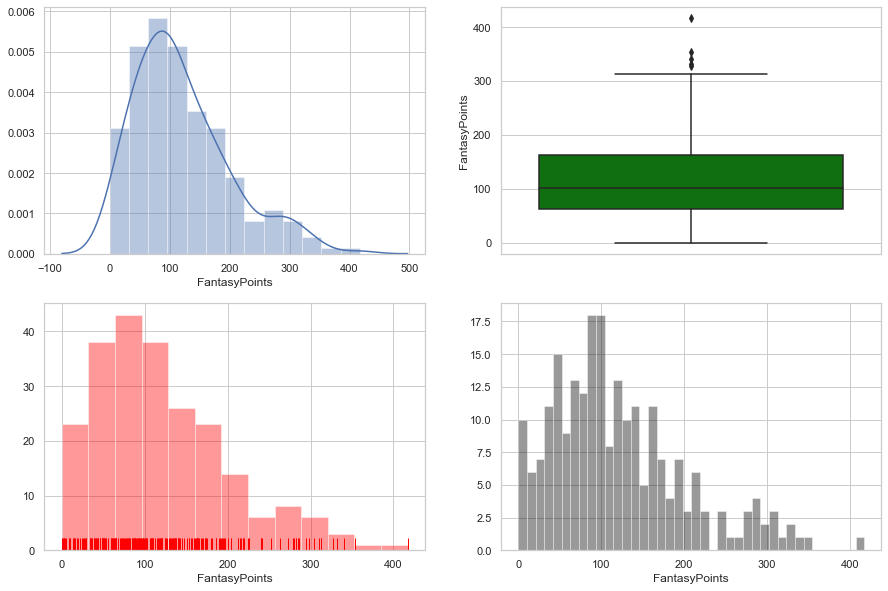

In [163]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['FantasyPoints'])

plt.subplot(2,2,2)
sns.boxplot(y='FantasyPoints',data=df, color='green')

plt.subplot(2,2,3)
sns.distplot(df['FantasyPoints'], kde=False, rug=True, color='red')

plt.subplot(2,2,4)
sns.distplot(df['FantasyPoints'], bins=40, kde=False, color='black')


I think the bottom right plot (histogram with extra "bins") gives us the best picture of the data. The box plot is pretty underwhelming. When we're only looking at one variable, the information it provides is pretty underwhelming. I don't think having a smoothed distribution line (top left) or tick markets along the x-axis (bottom left) add anything to the presentation.

For the next chart, we calculate a new measure called "touches," by adding rushing and receiving attempts. Then we chart total fantasy points against touches. We would expect a strong positive relationship, as players that touch the ball more are very likely to score more points.

<Figure size 1080x720 with 0 Axes>

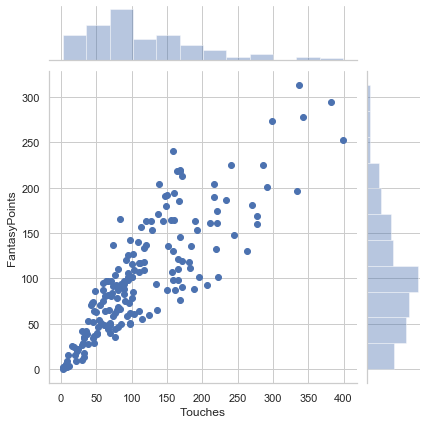

In [164]:
df['PointsFromYards'] = 0.1*df['RushingYards'] + 0.1*df['ReceivingYards'] + 0.04*df['PassingYards']

df['Touches'] = df['RushingAttempts'] + df['ReceivingTargets']

df_skill = df[(df['Position_x'] == "RB") | (df['Position_x'] == "WR") | (df['Position_x'] == "TE")]

plt.figure(figsize=(15,10))
sns.jointplot(x='Touches', y='FantasyPoints', data= df_skill)

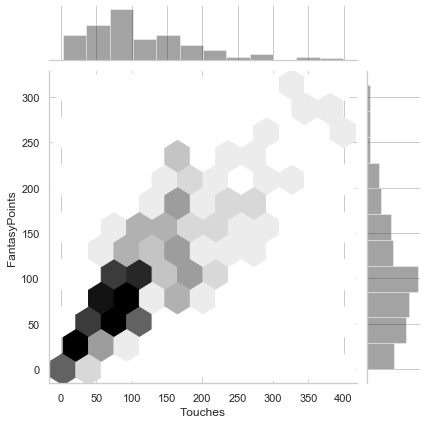

In [165]:
sns.jointplot(x='Touches', y='FantasyPoints', kind='hex', data= df_skill, color='k')

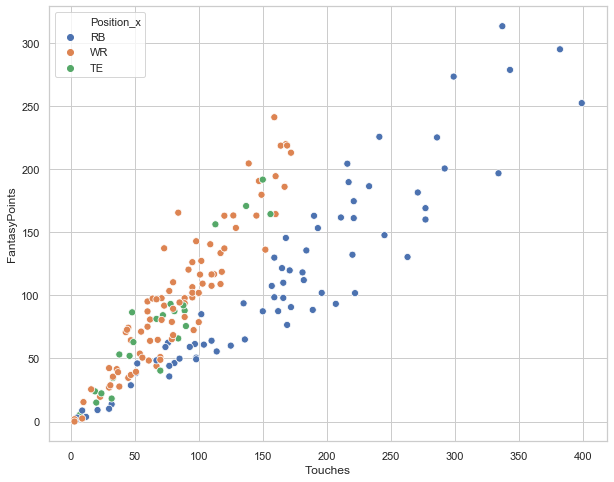

In [166]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='Touches', y='FantasyPoints', hue ='Position_x', s=50, data= df_skill)

I don't think the hex plot is ideal. It might be helpful to have a color gradient when we have a larger sample, and density is more difficult to discern, but here it doesn't do much for me. I think having histograms on the axes (charts 1 and 2) can contribute to the information we can glean form a chart.

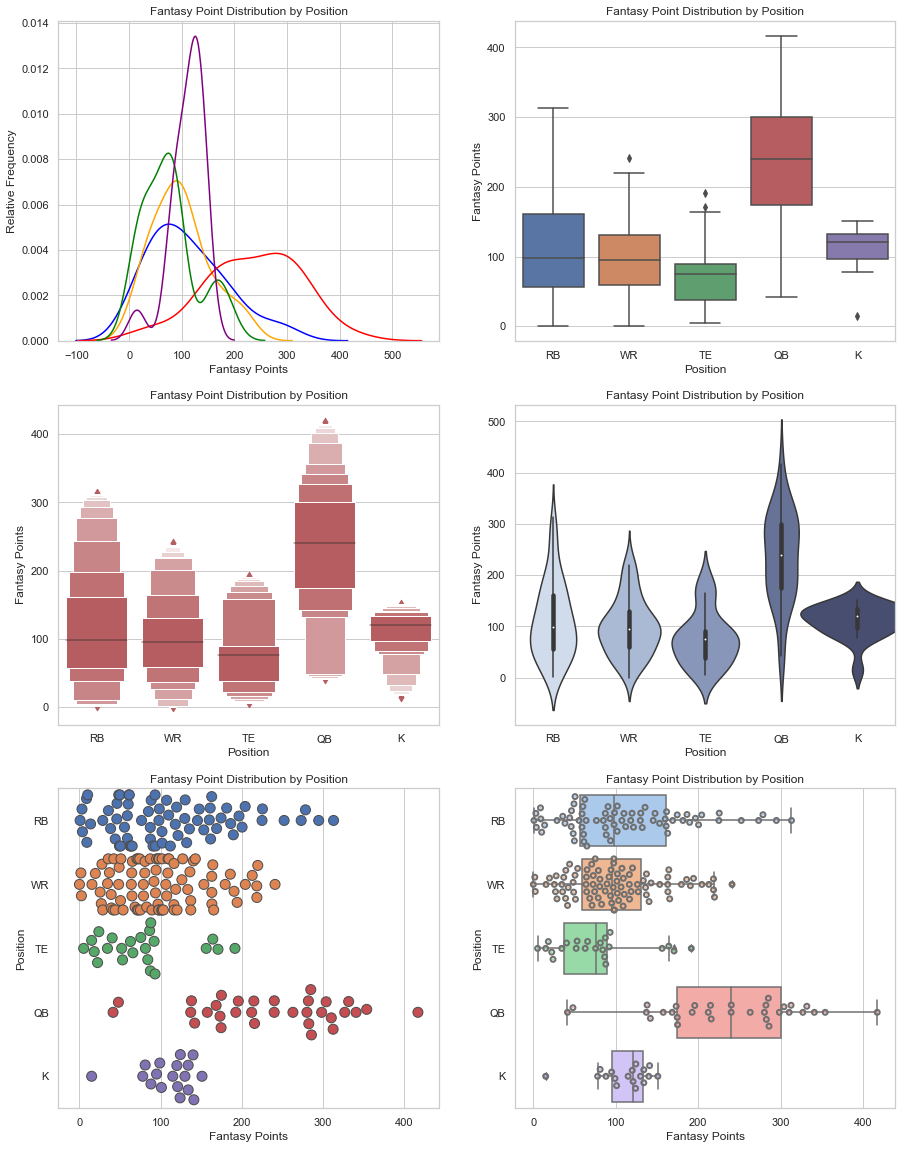

In [167]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.distplot(df[df['Position_x']=='RB']['FantasyPoints'], color='blue', hist=False)
sns.distplot(df[df['Position_x']=='WR']['FantasyPoints'], color='orange', hist=False)
sns.distplot(df[df['Position_x']=='QB']['FantasyPoints'], color='red', hist=False)
sns.distplot(df[df['Position_x']=='TE']['FantasyPoints'], color='green', hist=False)
sns.distplot(df[df['Position_x']=='K']['FantasyPoints'], color='purple', hist=False)
plt.title('Fantasy Point Distribution by Position')
plt.xlabel('Fantasy Points')
plt.ylabel('Relative Frequency')

plt.subplot(3,2,2)
sns.boxplot(y='FantasyPoints',x='Position_x',data=df)
plt.title('Fantasy Point Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Fantasy Points')


plt.subplot(3,2,3)
sns.boxenplot(x='Position_x', y="FantasyPoints", color='r', scale='linear', data=df)
plt.title('Fantasy Point Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Fantasy Points')

plt.subplot(3,2,4)
pal = sns.cubehelix_palette(5, rot=-.1, dark=.3)
sns.violinplot(x='Position_x', y="FantasyPoints", data=df, palette=pal, width=1.5)
plt.title('Fantasy Point Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Fantasy Points')

plt.subplot(3,2,5)
sns.swarmplot(x='FantasyPoints', y='Position_x', data=df, size=10, linewidth=1)
plt.title('Fantasy Point Distribution by Position')
plt.ylabel('Position')
plt.xlabel('Fantasy Points')

plt.subplot(3,2,6)
sns.set(style='whitegrid')
sns.boxplot(x='FantasyPoints',y='Position_x',data=df, palette='pastel')
sns.swarmplot(x='FantasyPoints', y='Position_x', data=df, size=2, linewidth=5, palette='pastel')
plt.title('Fantasy Point Distribution by Position')
plt.ylabel('Position')
plt.xlabel('Fantasy Points')

plt.show()

I think the chart on the bottom right gives us the most information, and is reasonably easy to read. The distribution plot (top right) is reasonably intuitive, but the amount of density to the left of zero makes me feel wary. The box plot, boxen plot, and violin plot are all easy to read, but there are certain kinds of data where we care about the more detailed aspects of the data, and I think the chart on the bottom right gives us that without taking away from readability.

In [168]:
df_master = df[df.Position_x != 'K']
df_master = df_master.loc[:,["Position_x","FantasyPoints","Touches","AverageDraftPosition","Age"]]

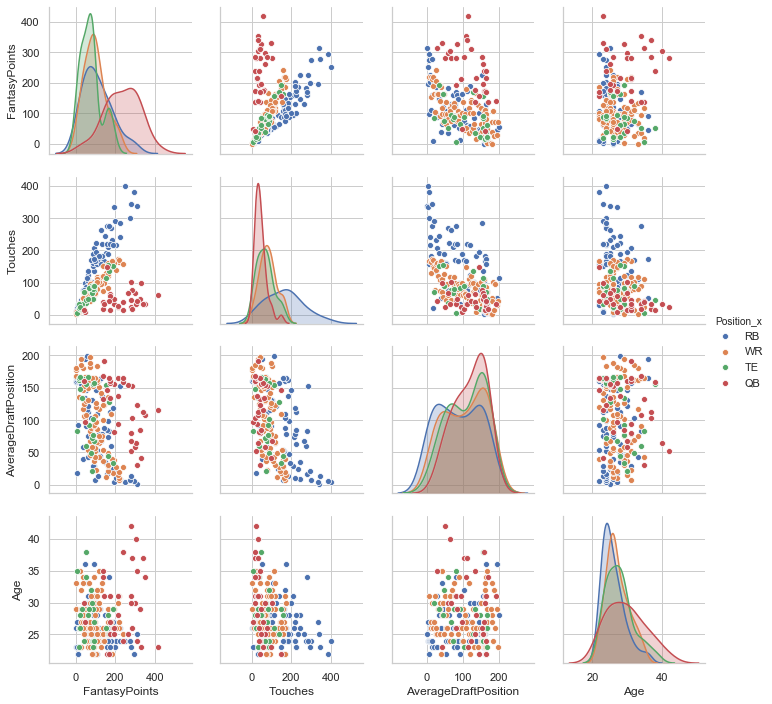

In [169]:
sns.pairplot(df_master, hue="Position_x")